<a href="https://colab.research.google.com/github/juampa795/Data_Science/blob/main/ProyectoDS_ParteI_MoralesJP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tercera entrega: Estructurando un proyecto de DS

 El presente proyecto buscará determinar el grado en que los clientes de un banco cuya información se trabajará, están dispuestos a salir de la institución dejando de utilizar los productos ofrecidos y en muchos casos recurrir a la competencia. Este tipo de comportamiento de los clientes, afecta las ganancias de la empresa y la participación que ocupa en el share del sistema financiero. Por esto es que poder determinar en cierto grado una predicción de los clientes que están dispuestos a salir de la entidad, nos permitirá llevar adelante politicas y campañas de retención de clientes de manera oportuna y reduciendo a cantidades aceptables las salidas. 
 Los bancos pueden usar estos modelos predictivos para determinar cuales son los clientes que tienen cierto riesgo de salir de la entidad aplicando sobre estos estrategias de retención. Todo esto tambien beneficia a la institución para mantener un buen desempeño en la variable clientes activos, lo cual es muestra importante del share que ocupa en el sistema financiero.
 En el presente Dataset podemos observar la selección de 10.000 clientes de la institución bajo analisis, con un detalle sobre ciertas características y comportamientos de los mismos, lo que podremos utilizar para determinar mediante un analisis predictivo el grado en que estos estrían dispuestos a dejar de usar los productos del banco, ya por diferentes situaciones detectadas como un mal servicio de atención a los clientes, costos de mantenimiento de cuentas y productos que resulten elevados, problemas relacionados con la seguridad que brinda el banco en su homebanking y aplicaciones moviles, falta de disponibilidad de ATM y sucursales para facilitar acceso a atención personalizada, ya que hoy en día la omnicanalidad es muy importante a la hora de elegir mantenerse en una entidad.

 Algunas de las preguntas que intentaré responder pueden ser:
 
1.   La cantidad de productos que posee un cliente es un indicador de su baja propensión a salir del Banco?
2.   Podemos idententificar algún patrón en el genero y/o ubicación del cliente que nos permita determinar una mayor propensión a salir del Banco?
3.   Existe algún patrón en función a las edades de nuestros clientes que nos permitan observar si estos son más propensos a dejar sus productos?





In [10]:
import pandas as pd
url = 'https://raw.githubusercontent.com/juampa795/Data_Science/main/Churn_Modelling.csv'
df = pd.read_csv(url, index_col=0)

df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [8]:
df.info() #Identificamos que no hay valores nulos en nuestro dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


#Caracteristicas relevantes:


1.   Geography: País al que pretenece
2.   Gender: Genero, Masculino o Femenino
3.   Age: Edad del cliente
4.   Tenure: 
5.   Balance: Saldo bancario del cliente
6.   NumOfProducts: Numero de productos que posee en el banco
7.   HasCrCard: Responde la pregunta de si posee tarjeta de crédito        
8.   IsActiveMember: Es miembro activo del banco  
9.   EstimatedSalary: Salario estimado
10.  Exited: 1 o 0 dependiendo de si el cliente avndona del banco




In [11]:
df.drop(columns = ['CustomerId','Surname'], inplace= True ) #Limpiando los datos que no voy a usar

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.describe() #interpretemos un poco cuales son los números que nos muestra nuestro dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
#importo las librerias gráficas que voy a utilizar en este proyecto
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Quiero empezar graficando la cantidad de clientes de perdi y aquellos que aun no dejan el banco
exit_count = df['Exited'].value_counts()
exit_count

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
exit_count/len(df)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

([<matplotlib.axis.XTick at 0x7f24412322c0>,
 [Text(0, 0, 'Not Exited'), Text(1, 0, 'Exited')])

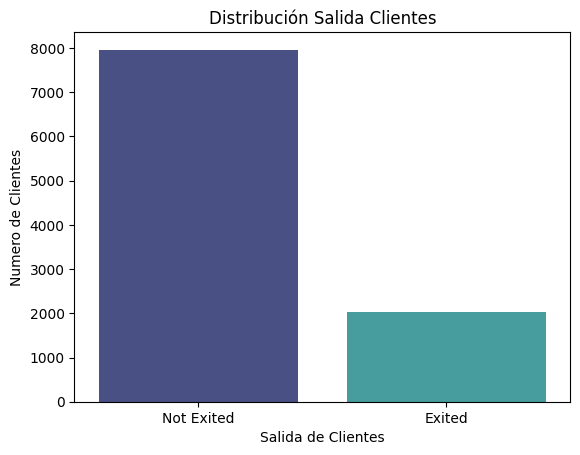

In [16]:
ax = sns.barplot(x = exit_count.index, y = exit_count.values, palette = 'mako')
ax.set(xlabel = 'Salida de Clientes', ylabel = 'Numero de Clientes', title = 'Distribución Salida Clientes')
plt.xticks([0, 1], ['Not Exited', 'Exited'])

In [30]:
#Definamos la relación que existe de clientes que dejan el Banco
exit_rel = (df['Exited']==1).sum()/len(df)

print('Ratio de los clientes que dejan el Banco:', exit_rel)

##Ratio de los clientes que dejan el Banco: 0.2037


Busquemos una relación en la salida de los clientes del banco respecto a la edad de los mismos:

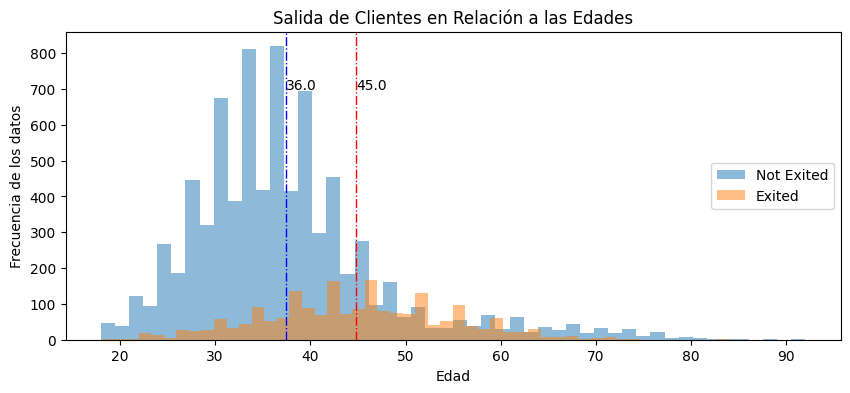

In [17]:
df['Exited']==0 #Arroja True si Exited=0, es decir el cliente no se va del banco
df['Exited']==1 #Arroja True si Exited=1, es decir el cliente se va del banco
df[df['Exited']==0].Age #Si df['Exited]==0 es falso, no se fue del banco y quiero que me diga la edad del cliente
df[df['Exited']==1].Age #Si df['Exited]==1 es falso, se fue del banco y quiero que me diga la edad
plt.figure(figsize=(10,4))
plt.hist(df[df['Exited']==0].Age, bins=50, alpha=0.5, label='Not Exited') #grafico la distribución de quienes no abandonaron el banco. Bins lo uso para agrupar
plt.hist(df[df['Exited']==1].Age, bins=50, alpha=0.5, label='Exited') #grafico la distribución de quienes si abandonaron el banco

#Coloco líneas en los valores promedio para identificar como es el comportamiento acorde a las edades de los clientes
plt.axvline(x=df[df['Exited']==0].Age.mean(), color='blue', linestyle='dashdot', linewidth=1)
plt.axvline(x=df[df['Exited']==1].Age.mean(), color='red', linestyle='dashdot', linewidth=1)
#agrego las etiquetas a los valores promedio, en las linea que cree en el codigo anterior
plt.text(df[df['Exited']==0].Age.mean(), 700, round(df[df['Exited']==0].Age.median(),0))
plt.text(df[df['Exited']==1].Age.mean(), 700, round(df[df['Exited']==1].Age.median(),0))

#Dando formato a la visualización
plt.title('Salida de Clientes en Relación a las Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de los datos')
plt.legend(loc='center right')
mp.style.use('bmh')


Puede observarse una distribución simétrica de la variable, ya sea en el caso de quienes han decidido salir del banco (Exited) como en aquellos que no (Not Exited). Con una media en Not Exited de 36 años y en Exited de 45 años.

Analicemos el p-valor y t-valor para estas variables

In [18]:
#Para obtener evidencias si la Hipotesis Nula puede ser cierta
import scipy.stats as stats 

grupo1 = df[df['Exited'] == 0]['Age'] #Defino dos agrupaciones
grupo2 = df[df['Exited'] == 1]['Age']

# Defino el t-test
t, p = stats.ttest_ind(grupo1, grupo2)
print('t = ', t)
print('p-value = ', p)


t =  -29.76681499437077
p-value =  1.2399313093427738e-186
